In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [344]:
df = pd.read_excel('DataNew.xlsx')
df.replace(0, float('NaN'), inplace=True)
df.dropna(subset = ["US10Y_Yield"], inplace=True)
df.dropna(subset = ["Bond_P"], inplace=True)

## Calculate Future Returns 

In [345]:
df['1D Return'] = np.log(df['Stock_P']/df['Stock_P'].shift(1))
df['1M nReturn'] = np.log(df['Stock_P'].shift(-20)/df['Stock_P'])
df['3M nReturn'] = np.log(df['Stock_P'].shift(-60)/df['Stock_P'])
df['6M nReturn'] = np.log(df['Stock_P'].shift(-120)/df['Stock_P'])

In [346]:
df.columns

Index(['Date', 'Fwd_Earnings', 'Stock_P', 'Stock_Vol', 'US10Y_Yield',
       'Put_Call', 'VIX_Spread', 'SPX_P', 'Bond_P', 'Earnings', 'Stock_Volume',
       'SPX_Impl_Spread_P-C', '1D Return', '1M nReturn', '3M nReturn',
       '6M nReturn'],
      dtype='object')

## Stock & Bond Zscores 

In [347]:
days=120

df['Stock_MA'] = df['Stock_P'].rolling(days).mean()
df['Stock_Z'] = (df['Stock_P']-df['Stock_MA'])/df['Stock_P'].rolling(days).std()

df['Stock_Vol_MA'] = df['Stock_Vol'].rolling(days).mean()
df['Stock_Vol_Z'] = (df['Stock_Vol']-df['Stock_Vol_MA'])/df['Stock_Vol'].rolling(days).std()

df['Stock_Volume_MA'] = df['Stock_Volume'].rolling(days).mean()
df['Stock_Volume_Z'] = (df['Stock_Volume']-df['Stock_Volume_MA'])/df['Stock_Volume'].rolling(days).std()

df['Bond_MA'] = df['Bond_P'].rolling(days).mean()
df['Bond_Z'] = (df['Bond_P']-df['Bond_MA'])/df['Bond_P'].rolling(days).std()

df['Put_Call_MA'] = df['Put_Call'].rolling(days).mean()
df['Put_Call_Z'] = (df['Put_Call']-df['Put_Call_MA'])/df['Put_Call'].rolling(days).std()

In [224]:
x = int(input())
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Stock_P'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Stock_Z'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Stock_Vol_Z'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Stock_Volume_Z'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Bond_Z'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.bar(df['Date'][x:x+300], df['3M nReturn'][x:x+300], width=1)
plt.scatter(df.loc[df['Earnings_Yield_Spread_Sell'], 'Date'][f:f+t].values,df.loc[df['Earnings_Yield_Spread_Sell'], '3M nReturn'][f:f+t].values, label='skitscat', color='yellow', s=40, marker="v")
plt.show()

ValueError: invalid literal for int() with base 10: ''

## Earnings Yield vs. 10 Year Yield 

In [348]:
days=240
bound=3
df['Earnings_Yield_Spread'] = (df['Earnings']/df['SPX_P']) - df['US10Y_Yield']
df['Earnings_Yield_Spread_MA'] = df['Earnings_Yield_Spread'].rolling(days).mean()
df['Earnings_Yield_Spread_Z'] = (df['Earnings_Yield_Spread']-df['Earnings_Yield_Spread_MA'])/df['Earnings_Yield_Spread'].rolling(days).std()
df['Earnings_Yield_Spread_Sell'] = df['Earnings_Yield_Spread_Z'] < -bound

0


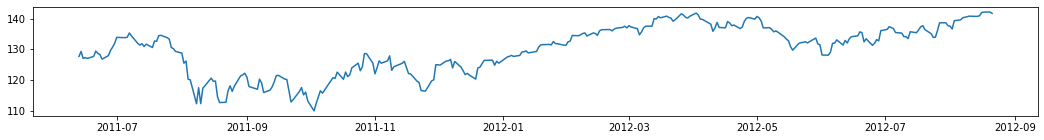

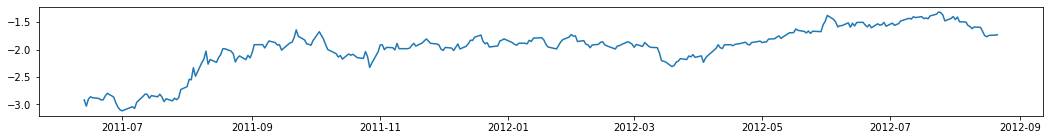

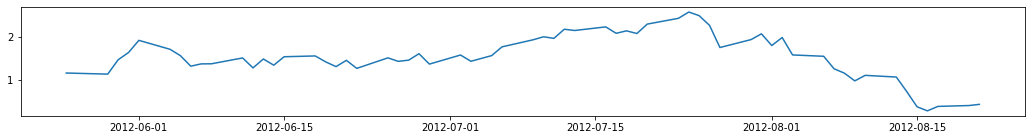

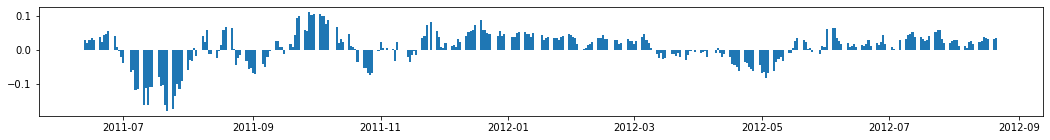

In [175]:
x = int(input())
f = df['Earnings_Yield_Spread_Sell'][0:x].sum()
t = df['Earnings_Yield_Spread_Sell'][x:x+300].sum()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Stock_P'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Earnings_Yield_Spread'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'][x:x+300], df['Earnings_Yield_Spread_Z'][x:x+300])
plt.show()
plt.figure(figsize=(18, 2))
plt.bar(df['Date'][x:x+300], df['1M nReturn'][x:x+300], width=1)
plt.scatter(df.loc[df['Earnings_Yield_Spread_Sell'], 'Date'][f:f+t].values,df.loc[df['Earnings_Yield_Spread_Sell'], '1M nReturn'][f:f+t].values, label='skitscat', color='yellow', s=40, marker="v")
plt.show()

## Put Call Vol Spread

In [349]:
days=120
df['SPX_Impl_Spread_P-C_MA'] = (1/df['SPX_Impl_Spread_P-C']).rolling(days).mean()
df['SPX_Impl_Spread_P-C_Z'] = ((1/df['SPX_Impl_Spread_P-C'])-df['SPX_Impl_Spread_P-C_MA'])/(1/df['SPX_Impl_Spread_P-C']).rolling(days).std()

0


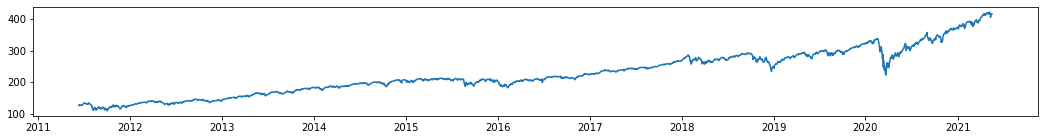

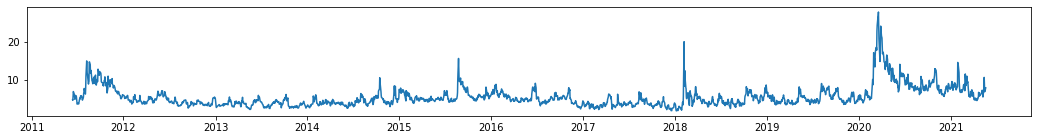

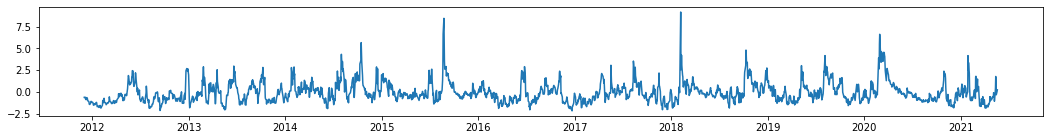

In [188]:
x = int(input())
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Stock_P'])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['SPX_Impl_Spread_P-C'])
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['SPX_Impl_Spread_P-C_Z'])
plt.show()

## Calculating Index

In [350]:
bound = 0.2
df['Score'] = 0.25*(df['Stock_Z']/3)+0.25*(df['Stock_Vol_Z']/-3)+0.25*(df['Bond_Z']/-3)+0.25*(df['Put_Call_Z']/-3)
df.dropna(subset = ["Score"], inplace=True)
df.dropna(subset = ["6M nReturn"], inplace=True)
df.dropna(subset = ["6M nReturn"], inplace=True)
df.dropna(subset = ["SPX_Impl_Spread_P-C_Z"], inplace=True)
df['BUY'] = df['Score'] < -bound
df['SELL'] =  (df['Score'] > bound) & (df['Earnings_Yield_Spread_Z'] < - 3)

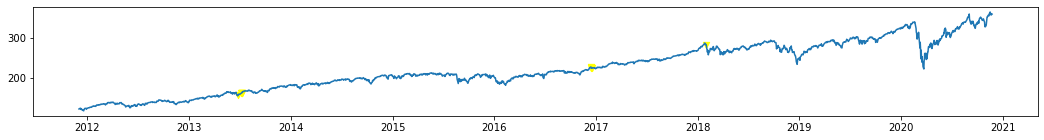

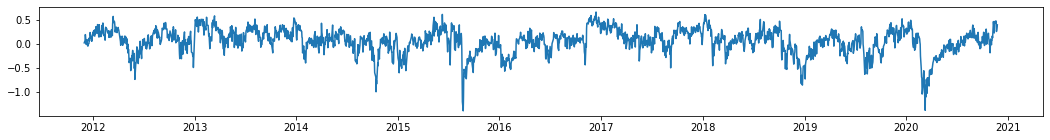

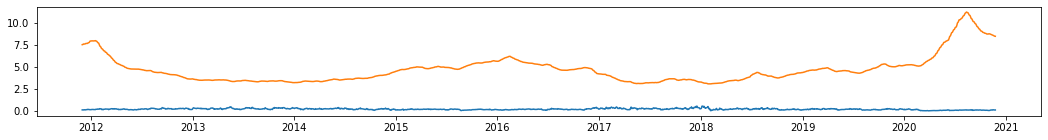

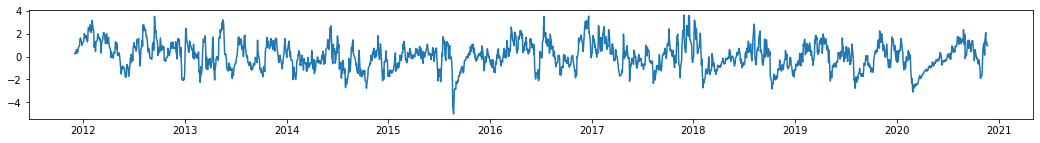

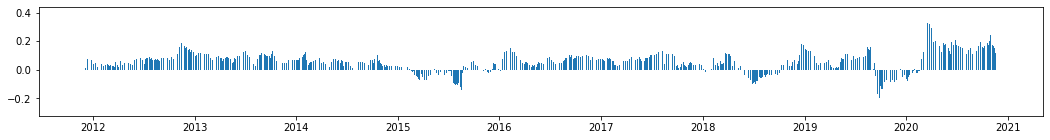

In [351]:
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Stock_P'])
plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], 'Stock_P'].values, label='skitscat', color='yellow', s=40, marker="v")
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Score'])
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(df['Date'], 1/df['SPX_Impl_Spread_P-C'])
plt.plot(df['Date'], 1/df['SPX_Impl_Spread_P-C_MA'])
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['SPX_Impl_Spread_P-C_Z'])
plt.show()

plt.figure(figsize=(18, 2))
plt.bar(df['Date'], df['6M nReturn'])
plt.show()

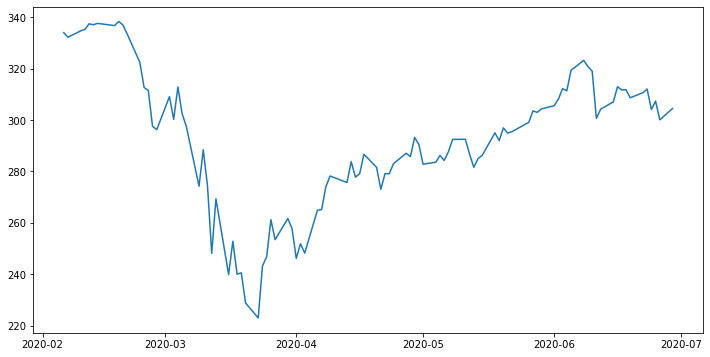

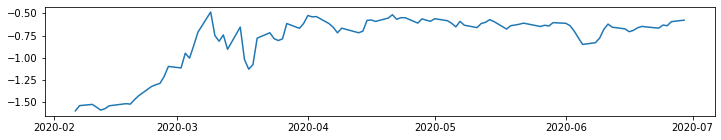

In [144]:
x = 2160
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][x:x+100], df['Stock_P'][x:x+100])
# plt.vlines(df['Date'][198], ymax=max(df['Stock_P'][x:x+100]), ymin=min(df['Stock_P'][x:x+100]))
plt.show()
plt.figure(figsize=(12, 2))
plt.plot(df['Date'][x:x+100], df['Earnings_Yield_Spread'][x:x+100])
plt.show()

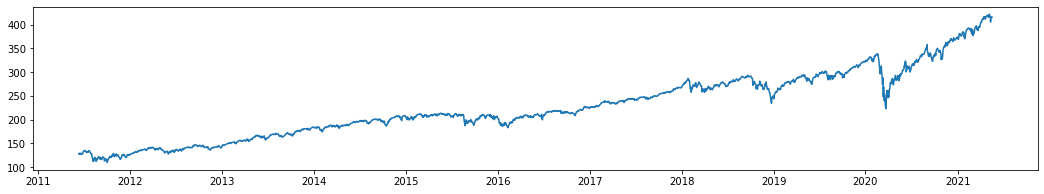

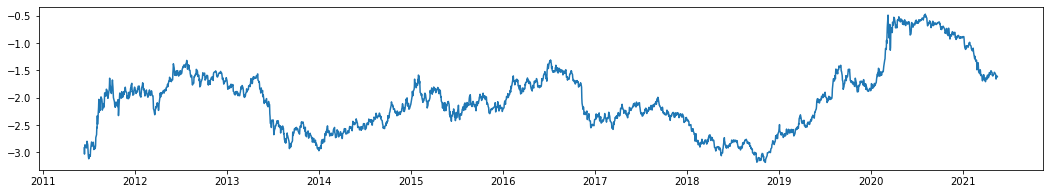

In [145]:
plt.figure(figsize=(18, 3))
plt.plot(df['Date'], df['Stock_P'])
plt.show()
plt.figure(figsize=(18, 3))
plt.plot(df['Date'], df['Earnings_Yield_Spread'])
plt.show()

In [41]:
df[100:160]

,Date,Fwd_Earnings,Stock_P,Stock_Vol,US10Y_Yield,Put_Call,VIX_Spread,SPX_P,Bond_P,Earnings,Stock_Volume,SPX_Impl_Spread_P-C,Earnings_Yield_Spread
100,2011-11-02,109.0312,123.990,32.74,1.9854,1.71,0.0,1237.9000,51.7750,89.7287,245529376,9.627,-1.912915
101,2011-11-03,109.0566,126.250,30.50,2.0734,1.49,0.0,1261.1600,51.4000,89.7269,280849120,8.895,-2.002254
102,2011-11-04,109.0420,125.481,30.16,2.0327,1.51,0.0,1253.2300,51.6150,89.7269,249401504,9.341,-1.961103
103,2011-11-07,109.0231,126.260,29.85,2.0371,1.40,0.0,1261.1200,51.8500,89.7238,196617168,8.679,-1.965954
104,2011-11-08,109.0009,127.880,27.48,2.0769,1.83,0.0,1275.9200,51.3100,89.7238,224426224,8.071,-2.006579
105,2011-11-09,109.0011,123.161,36.16,1.9615,1.66,0.0,1229.1000,52.1850,89.7238,337981984,9.958,-1.888500
106,2011-11-10,108.9971,124.320,32.81,2.0564,1.62,0.0,1239.6899,51.8000,89.7202,231866464,9.521,-1.984027
107,2011-11-11,109.0268,126.660,30.04,0.0000,0.00,0.0,1263.8600,51.1950,89.7202,189924320,8.408,0.070989
108,2011-11-14,108.9649,125.460,31.13,2.0556,1.46,0.0,1251.7800,51.8600,89.7202,159258224,9.392,-1.983926
109,2011-11-15,108.9504,126.083,31.22,2.0451,1.48,0.0,1257.8101,51.7400,89.7202,184709392,9.126,-1.973770


In [129]:
df.loc[df['Earnings_Yield_Spread_Sell'], 'Date'][100:6].values

array([], dtype='datetime64[ns]')

In [120]:
df['Earnings_Yield_Spread_Sell'][x:x+300].sum()

7

In [117]:
len(filter(True, df['Earnings_Yield_Spread_Sell'][x:x+300]))

TypeError: object of type 'filter' has no len()

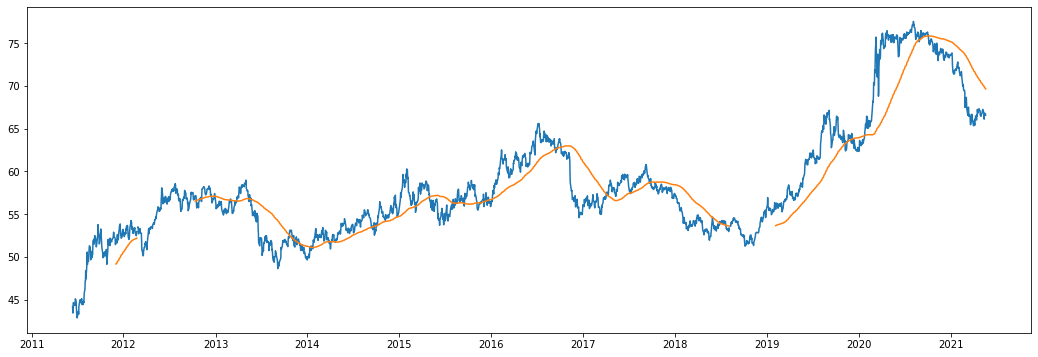

In [218]:
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Bond_P'])
plt.plot(df['Date'], df['Bond_MA'])
plt.show()

In [238]:
df.head(60)

,Date,Fwd_Earnings,Stock_P,Stock_Vol,US10Y_Yield,Put_Call,VIX_Spread,SPX_P,Bond_P,Earnings,...,Bond_Z,Put_Call_MA,Put_Call_Z,Earnings_Yield_Spread,Earnings_Yield_Spread_MA,Earnings_Yield_Spread_Z,Earnings_Yield_Spread_Sell,SPX_Impl_Spread_P-C_MA,SPX_Impl_Spread_P-C_Z,Score
0,2011-06-13,112.3680,127.700,19.61,2.9838,1.37,NaN,1271.8300,44.1650,83.8199,...,NaN,NaN,NaN,-2.917895,NaN,NaN,False,NaN,NaN,NaN
1,2011-06-14,112.3796,129.320,18.26,3.0972,1.31,NaN,1287.8700,43.4250,83.8199,...,NaN,NaN,NaN,-3.032116,NaN,NaN,False,NaN,NaN,NaN
2,2011-06-15,112.3864,127.020,21.32,2.9692,1.48,NaN,1265.4200,44.3350,83.8218,...,NaN,NaN,NaN,-2.902960,NaN,NaN,False,NaN,NaN,NaN
3,2011-06-16,112.3856,127.300,22.73,2.9274,1.17,NaN,1267.6400,44.6400,83.8218,...,NaN,NaN,NaN,-2.861276,NaN,NaN,False,NaN,NaN,NaN
4,2011-06-17,112.3535,127.050,21.85,2.9445,1.27,NaN,1271.5000,44.5750,83.8292,...,NaN,NaN,NaN,-2.878571,NaN,NaN,False,NaN,NaN,NaN
5,2011-06-20,112.2938,127.700,19.99,2.9580,1.32,NaN,1278.3600,44.4700,83.7630,...,NaN,NaN,NaN,-2.892476,NaN,NaN,False,NaN,NaN,NaN
6,2011-06-21,112.2980,129.450,18.86,2.9835,1.33,NaN,1295.5200,44.3100,83.7630,...,NaN,NaN,NaN,-2.918844,NaN,NaN,False,NaN,NaN,NaN
7,2011-06-22,112.2864,128.670,18.52,2.9825,1.17,NaN,1287.1400,44.3150,83.7630,...,NaN,NaN,NaN,-2.917423,NaN,NaN,False,NaN,NaN,NaN
8,2011-06-23,112.2781,128.301,19.29,2.9116,1.33,NaN,1283.5000,44.7500,83.7630,...,NaN,NaN,NaN,-2.846339,NaN,NaN,False,NaN,NaN,NaN
9,2011-06-24,112.2037,126.810,21.10,2.8636,1.40,NaN,1268.4500,45.0850,83.7678,...,NaN,NaN,NaN,-2.797561,NaN,NaN,False,NaN,NaN,NaN


In [260]:
df['SELL'].sum()

0

In [291]:
df['RiskAdjPrice'] = df['Stock_P']/df['Stock_Vol']
df['RAP_MA'] = df['RiskAdjPrice'].rolling(days).mean()
df['RAP_Z'] = (df['RiskAdjPrice']-df['RAP_MA'])/df['RiskAdjPrice'].rolling(days).std()


<AxesSubplot:>

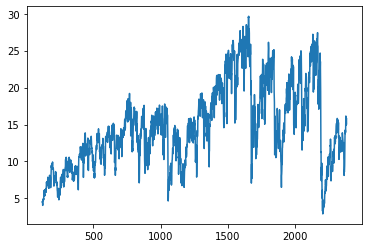

In [289]:
df['RiskAdjPrice'].plot()

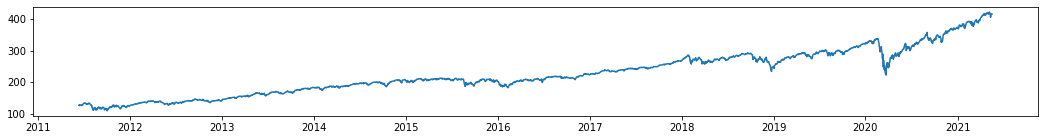

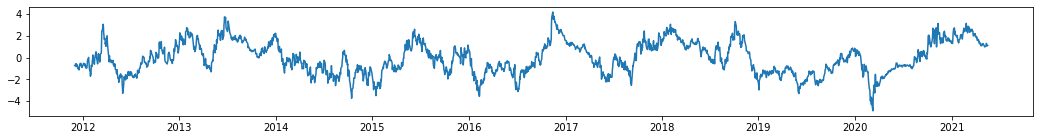

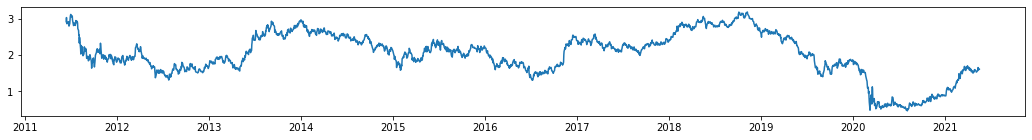

In [339]:
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Stock_P'])
# plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], 'Stock_P'].values, label='skitscat', color='yellow', s=40, marker="v")
plt.show()
plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Earnings_Yield_Spread_Z'])
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Earnings_Yield_Spread'])
plt.show()

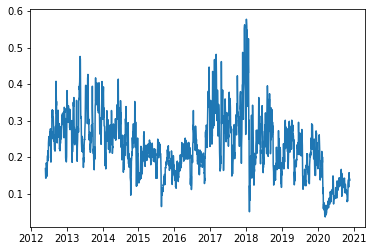

In [310]:
plt.plot(df['Date'], 1/df['SPX_Impl_Spread_P-C'])

242    NaN
243    NaN
244    NaN
245    NaN
246    NaN
        ..
2375   NaN
2376   NaN
2377   NaN
2378   NaN
2379   NaN
Name: VIX_Spread, Length: 2119, dtype: float64

In [342]:
def do_strat(n, b):
    
    df = pd.read_excel('DataNew.xlsx')
    df.replace(0, float('NaN'), inplace=True)
    df.dropna(subset = ["US10Y_Yield"], inplace=True)
    df.dropna(subset = ["Bond_P"], inplace=True)
    
    df['1D Return'] = np.log(df['Stock_P']/df['Stock_P'].shift(1))
    df['1M nReturn'] = np.log(df['Stock_P'].shift(-21)/df['Stock_P'].shift(-1))
    df['3M nReturn'] = np.log(df['Stock_P'].shift(-61)/df['Stock_P'].shift(-1))
    df['6M nReturn'] = np.log(df['Stock_P'].shift(-121)/df['Stock_P'].shift(-1))
    
    df['Earnings_Yield_Spread'] = ((df['Earnings']/df['SPX_P']) - df['US10Y_Yield'])*-1
    df['Earnings_Yield_Spread_MA'] = df['Earnings_Yield_Spread'].rolling(days).mean()
    df['Earnings_Yield_Spread_Z'] = (df['Earnings_Yield_Spread']-df['Earnings_Yield_Spread_MA'])/df['Earnings_Yield_Spread'].rolling(days).std()

    df['BUY'] = df['Earnings_Yield_Spread_Z'] < -b
    df['SELL'] = df['Earnings_Yield_Spread_Z'] > b
    
    df['rb6'] = df.BUY * df['6M nReturn'] 
    df['rs6'] = df.SELL * -df['6M nReturn']
    
    df['rb3'] = df.BUY * df['3M nReturn'] 
    df['rs3'] = df.SELL * -df['3M nReturn']
    
    buy_amount = df["BUY"].sum()
    buy_return6 = df["rb6"].sum()/buy_amount
    buy_return3 = df["rb3"].sum()/buy_amount
    sell_amount = df["SELL"].sum()
    sell_return6 = df["rs6"].sum()/sell_amount
    sell_return3 = df["rs3"].sum()/sell_amount
    
    return buy_amount, buy_return6, buy_return3, sell_amount, sell_return6, sell_return3

result = pd.DataFrame(columns = ['period', 
                                 'bound1', 
                                 '# bought', 
                                 '6M Breturn', 
                                 '3M Breturn',
                                 '# sold', 
                                 '6M Sreturn',
                                 '3M Sreturn']
                     )

n=0
for i in np.linspace(20, 360, 18):
    for j in np.linspace(2.1,4,20):
        buy_amount, buy_return6, buy_return3, sell_amount, sell_return6, sell_return3 = do_strat(int(i),j)
        result = result.append(pd.Series([0,0,0,0,0,0,0]), ignore_index=True)
        result.iloc[n, 0] = i 
        result.iloc[n, 1] = j  
        result.iloc[n, 2] = buy_amount 
        result.iloc[n, 3] = buy_return6
        result.iloc[n, 4] = buy_return3 
        result.iloc[n, 5] = sell_amount 
        result.iloc[n, 6] = sell_return6 
        result.iloc[n, 7] = sell_return3
        n+=1
        
result.to_excel('epsYieldSpread.xlsx')
        

In [337]:
df = pd.read_excel('DataNew.xlsx')
df.replace(0, float('NaN'), inplace=True)
df.dropna(subset = ["US10Y_Yield"], inplace=True)
df.dropna(subset = ["Bond_P"], inplace=True)


df['Earnings_Yield_Spread_Sell'] = df['Earnings_Yield_Spread_Z'] < -bound

In [ ]:
# Put vs. Call Demand  
    
    df['SPX_Impl_Spread_P-C_MA'] = (1/df['SPX_Impl_Spread_P-C']).rolling(n).mean()
    df['SPX_Impl_Spread_P-C_Z'] = ((1/df['SPX_Impl_Spread_P-C'])-df['SPX_Impl_Spread_P-C_MA'])/(1/df['SPX_Impl_Spread_P-C']).rolling(n).std()
    
    df['BUY'] = df['SPX_Impl_Spread_P-C_Z'] < -b
    df['SELL'] = df['SPX_Impl_Spread_P-C_Z'] > b